<a href="https://colab.research.google.com/github/pjenkin/pjTensorFlowTut/blob/main/PJ_neural_net_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural network classification (i.e. multi-class classification, classifying this as A, B or C, or binary clasification, tis or tisn't, or multi-label classication, tis like this that and the other)

Written after https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/02_neural_network_classification_in_tensorflow.ipynb



In [ ]:
# check TF version
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")



2.17.0
Notebook last run (end-to-end): 2024-11-13 18:07:21.613437


First of all in this, make a pair of noisy circles, as toy dataset, to try to distinguish values one from another. Use built in sklearn function to make up these data make_circles which will always make 2 rings.

In [ ]:
from sklearn.datasets import make_circles

# generate 1000 samples
n_samples = 1000

X,y = make_circles(n_samples, noise=0.03, random_state=42)  # use built-in for noisy circles points features & labels

print (X)
#print(y.head())
print (y[:10]) # first ten labels (minus for last ten)

# NB X feature data have 2 'columns' and y labels are binary

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 ...
 [-0.13690036 -0.81001183]
 [ 0.67036156 -0.76750154]
 [ 0.28105665  0.96382443]]
[1 1 1 1 0 1 1 1 1 0]


dataframe to visualise X (features) and y (labels)

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label": y})
# everything (every row) from 0th column, everything from 1st X column, everything from y
print(circles.head())
# use value_counts() to check labels population
print(circles.label.value_counts())

         X0        X1  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0
label
1    500
0    500
Name: count, dtype: int64


Two label only mean this will be a binary classification.
Visualise using pyplot (scatter)
Scatter plot is showing 2 clear rings, and nothing else, confirming that binary classification would make sense (either tis in ring A, or not).

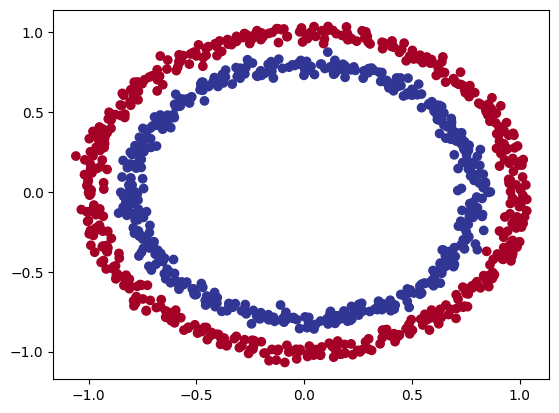

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Check the shape of the features and labels data (for net design) and its makeup
print(X.shape)
print(y.shape)   # NB y is scalars (0 or 1) which don't have a dimension
print(len(X))
print(len(y))
# i.e. 1000 rows in each of columns 0 and 1, and in labels
print("show the inputs (features now called X0 and X1) and ouputs (label)")
print(X[0], y[0])
# showing that input needing tensor dimension 2 (each time, for X0 and X2)
# and outputs tensor with at least 1 value (i.e. to match the label)

(1000, 2)
(1000,)
1000
1000
show the inputs (features now called X0 and X1) and ouputs (label)
[0.75424625 0.23148074] 1


Lots of models to make.....

Start with the first, model_1
using BinaryCrossentropy as loss function (things to optimise)

In [ ]:
tf.random.set_seed(67)
# 1 define
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2 compile
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy'],
)

# 3 fit
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4837 - loss: 3.3996
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5128 - loss: 0.7453
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5183 - loss: 0.7073 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5253 - loss: 0.6975  
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5174 - loss: 0.6947 


Accuracy is about 50% (i.e. a coin toss)
Try extending number of epochs from 5 by another 200

In [ ]:
# 3 fit again, with 200 more epochs
model_1.fit(X,y,epochs=200)
model_1.evaluate(X,y)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5291 - loss: 0.6938 
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5327 - loss: 0.6936 
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5149 - loss: 0.6936 
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5033 - loss: 0.6936 
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5049 - loss: 0.6937 
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5022 - loss: 0.6937
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5013 - loss: 0.6937
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4983 - loss: 0.6937 
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5007 - loss: 0.6937 
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5012 - loss: 0.6937 
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5012 - loss: 0.6937 
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

[0.6932579278945923, 0.5]

Still about only 50% accuracy after 205 epochs - something else will need improving.

In [ ]:
tf.random.set_seed(67)
# 1 define
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2 compile
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy'],
)

# 3 fit
model_2.fit(X,y,epochs=100)

model_2.evaluate(X,y)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4884 - loss: 6.4195   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4880 - loss: 5.5718 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4583 - loss: 6.7110 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5002 - loss: 7.9685  
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5002 - loss: 7.9685  
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5002 - loss: 7.9685 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5002 - loss: 7.9685 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5002 - loss: 7.9685  
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5002 - loss: 7.9685
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5002 - loss: 7.9685 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5002 - loss: 7.9685 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

[7.971191883087158, 0.5]

Accuracy hardly improved (about 0.05% better) with an extra layer of 1 neuron and running a hundred epochs.
* Try adding layers (3 layers with 100,10 then 1 (output) neurons
* change the optimiser from SGD to Adam

In [ ]:
tf.random.set_seed(67)
# 1 define
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2 compile
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    #optimizer=tf.keras.optimizers.SGD(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

# 3 fit
model_3.fit(X,y,epochs=100)

model_3.evaluate(X,y)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4883 - loss: 4.1520
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4044 - loss: 3.7853
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4260 - loss: 3.5869 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4380 - loss: 3.1381 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4187 - loss: 2.5441 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4998 - loss: 0.8842
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4998 - loss: 0.8242
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4998 - loss: 0.7960 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4998 - loss: 0.7749 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4998 - loss: 0.7582 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4998 - loss: 0.7446 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

[0.6931926608085632, 0.4970000088214874]

Accuracy no better (worse, even) than 50% with 3 layers with 10/10/1 neurons and the Adam optimiser.
Try inspecting the working using a custom function.
This is to plot a graph (meshgrid) and via this, plot the predictions, and a line between the zones

In [ ]:
 # There is https://scikit-learn.org/dev/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html
 # try this again? may need prediction output as input

In [ ]:
# decision boundary plotting, copy-pasted from original at
# https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/02_neural_network_classification_in_tensorflow.ipynb
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
# NB THE BESPOKE CODE DID NOT DESCRIBE THE PARAMETERS IN THE SIGNATURE

  # Define the axis boundaries of the plot and create a meshgrid FOR DISPLAY IN A GRID
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


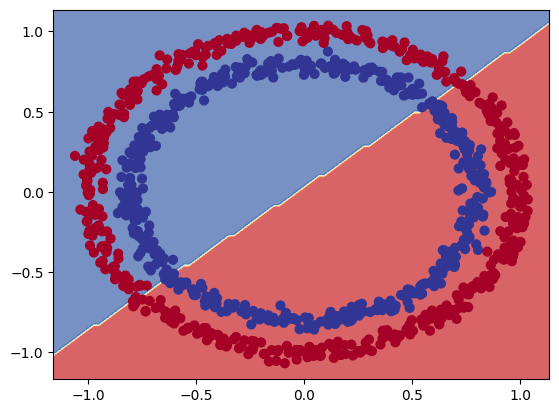

In [ ]:
# use the above bespoke decision boundary plotting function
plot_decision_boundary(model_3, X, y)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 627.1485 - mae: 627.1485
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 474.2667 - mae: 474.2667 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 321.7271 - mae: 321.7271 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 167.2406 - mae: 167.2406 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.8295 - mae: 46.8295 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 98.7832 - mae: 98.7832 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 88.6578 - mae: 88.6578   
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.2300 - mae: 46.2300 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56.1917 - mae: 56.1917 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.6650 - mae: 39.6650 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.2855 - mae: 43.2855 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.9479 - mae: 39.9479 
Epoch 13/100
5/5

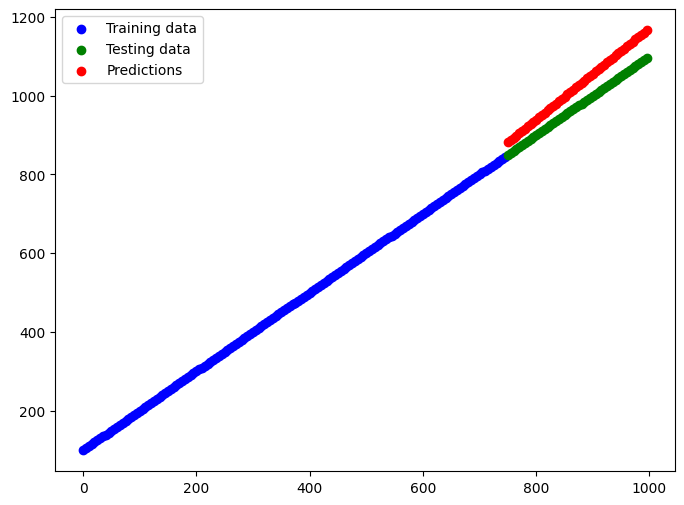

In [ ]:
#tf.random.set_seed(67)

# Set random seed
tf.random.set_seed(67)

# Create some regression data (for trying this out on model to see if it'll get better accuracy)
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)  # standard straight line of X vs y

# Split it into training and test sets
X_reg_train = X_regression[:150]    # 150 of 1000
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)


# 1 define
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2 compile
model_3.compile(
    #loss=tf.keras.losses.BinaryCrossentropy(),
    loss=tf.keras.losses.mae, # change model loss function (to optimise) back to regression
    #optimizer=tf.keras.optimizers.SGD(),
    optimizer=tf.keras.optimizers.Adam(),
    #metrics=['accuracy'],
    metrics = ['mae'] # go back to MAE (rather than accuracy) as a metric for this regression
)

# 3 fit
#model_3.fit(X,y,epochs=100)
# but fit onto regression data instead (with expand_dims workaround)

model_3.fit(tf.expand_dims(X_reg_train, axis=1), y_reg_train, epochs=100)


model_3.evaluate(X_reg_train,y_reg_train)
#plot_decision_boundary(model_3, X, y) # maybe not plot boundary if this is regression??? check this....

y_reg_preds = model_3.predict(X_reg_test)

# plot predictions vs actual regression data (train and test)
plt.figure(figsize=(8,6))
plt.scatter(X_reg_train,y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test,y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test,y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend()

NB:

* MAE is not down every epoc/iteration, but _is_ trending down
* predictions graphed are not wildly off

Sill to do:  non-linearity i.e. lower loss with sigmoid activation than with linear -



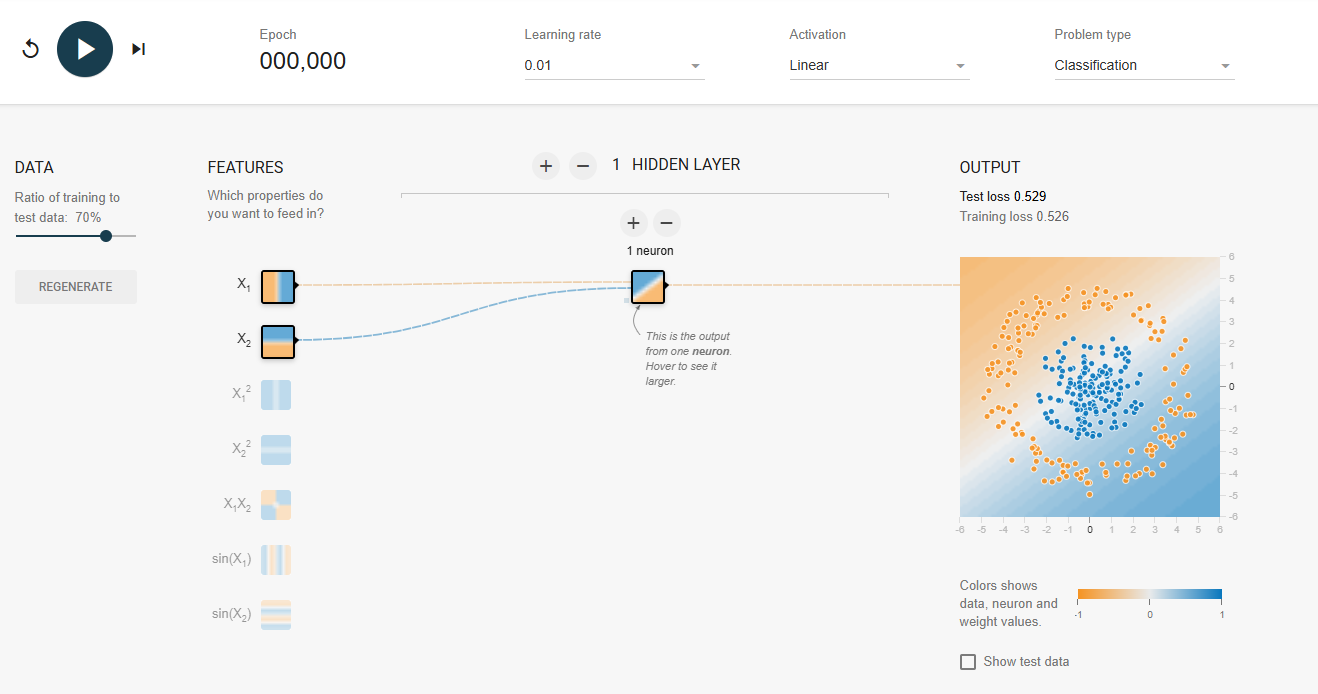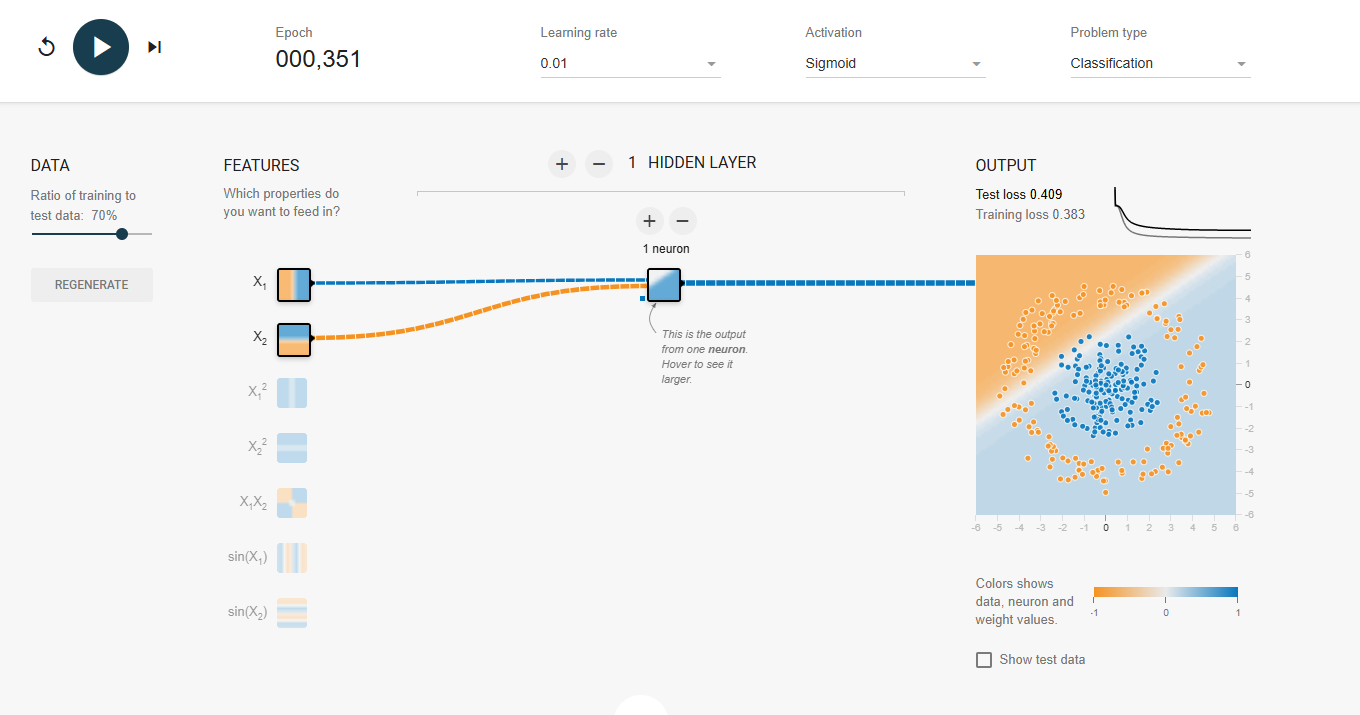


https://playground.tensorflow.org/#activation=linear&batchSize=1&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.09561&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularizationRate_hide=true&discretize_hide=true&regularization_hide=true&dataset_hide=true&noise_hide=true&batchSize_hide=true

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4998 - loss: 4.5517   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4998 - loss: 4.0100 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4998 - loss: 3.6038 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4998 - loss: 2.8148 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4998 - loss: 1.2753 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4998 - loss: 0.9848 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4998 - loss: 0.9522 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4998 - loss: 0.9277 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4998 - loss: 0.9068
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4998 - loss: 0.8884 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4998 - loss: 0.8720 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


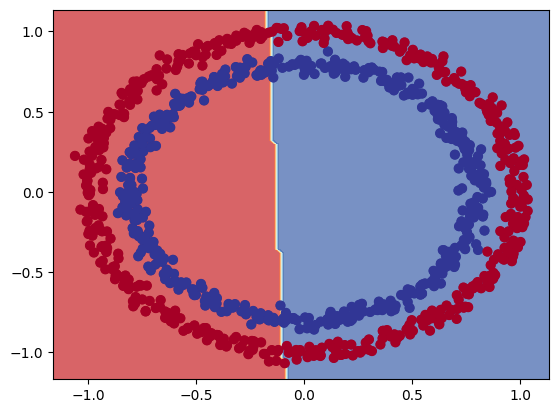

In [ ]:
tf.random.set_seed(67)

 #1 define model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # NB try with a linear activation in the 1 hidden layer
    tf.keras.layers.Dense(1) # output layer   (no input layer need be specified)
])

#2 compile
model_4.compile(
    loss= tf.keras.losses.binary_crossentropy,    # not now using regression, which would have been e.g. mae as loss function
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']    # go back to accuracy now as metric instead of MAE (not using regression now)
)

model_4.fit(X, y, epochs=100)   # back to non-regression data, from circles
model_4.evaluate(X, y)

# look at original make_circles data
plt.scatter(X[:,0], X[:,1],c=y, cmap=plt.cm.RdYlBu)

# also use bespoke decision boundary plotting function to see results
plot_decision_boundary(model_4, X, y)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4685 - loss: 5.8876   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4707 - loss: 5.6897 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4695 - loss: 5.5661 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4689 - loss: 5.3290 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4560 - loss: 4.9954 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4594 - loss: 4.9553 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4591 - loss: 4.9526 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4591 - loss: 4.9505 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4595 - loss: 4.9485 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4605 - loss: 4.9464
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4595 - loss: 4.9445 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

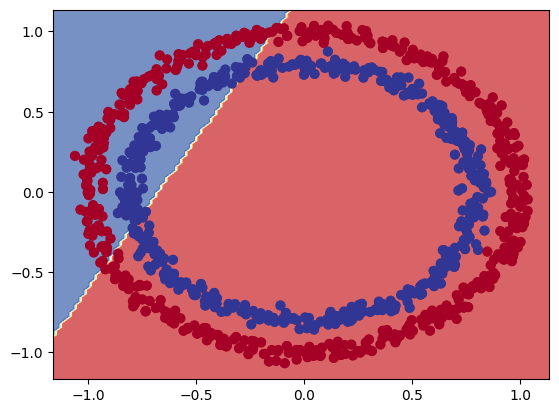

In [ ]:
tf.random.set_seed(67)

 #1 define model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # NB try model_5 with a Rectified Linear Unit activation in the 1 hidden layer
    tf.keras.layers.Dense(1) # output layer   (no input layer need be specified)
])

#2 compile
model_5.compile(
    loss= tf.keras.losses.binary_crossentropy,    # not now using regression, which would have been e.g. mae as loss function
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']    # go back to accuracy now as metric instead of MAE (not using regression now)
)

model_5.fit(X, y, epochs=100)   # back to non-regression data, from circles
model_5.evaluate(X, y)

# look at original make_circles data
plt.scatter(X[:,0], X[:,1],c=y, cmap=plt.cm.RdYlBu)

# also use bespoke decision boundary plotting function to see results
plot_decision_boundary(model_5, X, y)


Still about 50% accuracy, with no stepwise improvement over epochs, with Relu.....

So try increasing layers (2 hidden layers, up from 1 - so 3 Dense layers declared in all) - also each hidden layer to have 4 neurons (up from 1)

As per https://www.google.com/url?q=https%3A%2F%2Fplayground.tensorflow.org%2F%23activation%3Drelu%26batchSize%3D10%26dataset%3Dcircle%26regDataset%3Dreg-plane%26learningRate%3D0.001%26regularizationRate%3D0%26noise%3D0%26networkShape%3D4%2C4%26seed%3D0.93799%26showTestData%3Dfalse%26discretize%3Dfalse%26percTrainData%3D50%26x%3Dtrue%26y%3Dtrue%26xTimesY%3Dfalse%26xSquared%3Dfalse%26ySquared%3Dfalse%26cosX%3Dfalse%26sinX%3Dfalse%26cosY%3Dfalse%26sinY%3Dfalse%26collectStats%3Dfalse%26problem%3Dclassification%26initZero%3Dfalse%26hideText%3Dfalse%26regularization_hide%3Dtrue%26regularizationRate_hide%3Dtrue%26batchSize_hide%3Dtrue%26dataset_hide%3Dtrue#:~:text=https%3A//playground.tensorflow.org/%23activation%3Drelu%26batchSize%3D10%26dataset%3Dcircle%26regDataset%3Dreg%2Dplane%26learningRate%3D0.001%26regularizationRate%3D0%26noise%3D0%26networkShape%3D4%2C4%26seed%3D0.93799%26showTestData%3Dfalse

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4998 - loss: 4.3717
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4998 - loss: 3.5267 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4555 - loss: 2.8032 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4670 - loss: 1.5145 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4697 - loss: 0.8908 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4664 - loss: 0.8528 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4682 - loss: 0.8283 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4616 - loss: 0.8090 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4588 - loss: 0.7928 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4545 - loss: 0.7794 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4505 - loss: 0.7681
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

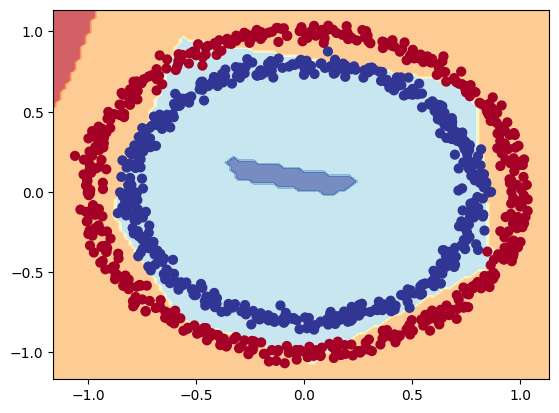

In [ ]:
tf.random.set_seed(67)

 #1 define model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # NB try model_6 with 2 hidden Rectified Linear Unit activation hidden layers
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # NB try model_6 with 2 hidden Rectified Linear Unit activation hidden layers
    tf.keras.layers.Dense(1) # output layer   (no input layer need be specified)
])

#2 compile
model_6.compile(
    loss= tf.keras.losses.binary_crossentropy,    # not now using regression, which would have been e.g. mae as loss function
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']    # go back to accuracy now as metric instead of MAE (not using regression now)
)

model_6.fit(X, y, epochs=100)   # back to non-regression data, from circles
model_6.evaluate(X, y)

# look at original make_circles data
#plt.scatter(X[:,0], X[:,1],c=y, cmap=plt.cm.RdYlBu)

# also use bespoke decision boundary plotting function to see results
plot_decision_boundary(model_6, X, y)


2 layers of 4 neurons still didn't work very well.
Try setting the 1 output layer's activation function to sigmoid....

cf the table of classification models' architecture, where binary classification output layer activation function is usually _sigmoid_

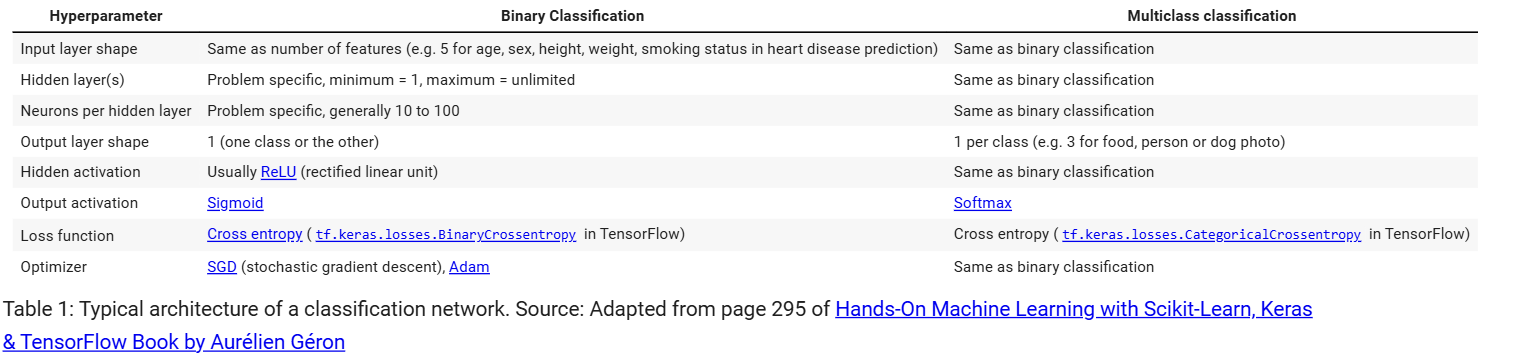

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5057 - loss: 0.7991
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4956 - loss: 0.7584 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4944 - loss: 0.7343 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4618 - loss: 0.7210 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4918 - loss: 0.7135
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4841 - loss: 0.7089 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4845 - loss: 0.7057 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4509 - loss: 0.7032 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4340 - loss: 0.7012
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4635 - loss: 0.6994 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4666 - loss: 0.6978 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

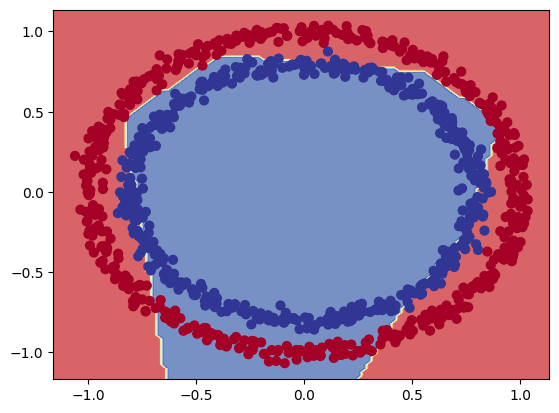

In [ ]:
tf.random.set_seed(67)

 #1 define model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # NB try model_6 with 2 hidden Rectified Linear Unit activation hidden layers
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # NB try model_6 with 2 hidden Rectified Linear Unit activation hidden layers
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # output layer activation as sigmoid  (no input layer need be specified)
])

#2 compile
model_7.compile(
    loss= tf.keras.losses.binary_crossentropy,    # not now using regression, which would have been e.g. mae as loss function
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']    # go back to accuracy now as metric instead of MAE (not using regression now)
)

model_7.fit(X, y, epochs=100)   # back to non-regression data, from circles
model_7.evaluate(X, y)

# look at original make_circles data
#plt.scatter(X[:,0], X[:,1],c=y, cmap=plt.cm.RdYlBu)

# also use bespoke decision boundary plotting function to see results
plot_decision_boundary(model_7, X, y)

A  tf.Tensor(
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.], shape=(20,), dtype=float32)
Sigmoid  tf.Tensor(
[4.5397872e-05 1.2339458e-04 3.3535014e-04 9.1105117e-04 2.4726233e-03
 6.6928510e-03 1.7986210e-02 4.7425874e-02 1.1920292e-01 2.6894143e-01
 5.0000000e-01 7.3105860e-01 8.8079703e-01 9.5257413e-01 9.8201376e-01
 9.9330717e-01 9.9752742e-01 9.9908900e-01 9.9966466e-01 9.9987662e-01], shape=(20,), dtype=float32)
RELU  tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 3. 4. 5. 6. 7. 8. 9.], shape=(20,), dtype=float32)
Linear  tf.Tensor(
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.], shape=(20,), dtype=float32)
Same i.e. unchanged?
tf.Tensor(
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True], shape=(20,), dtype=bool)


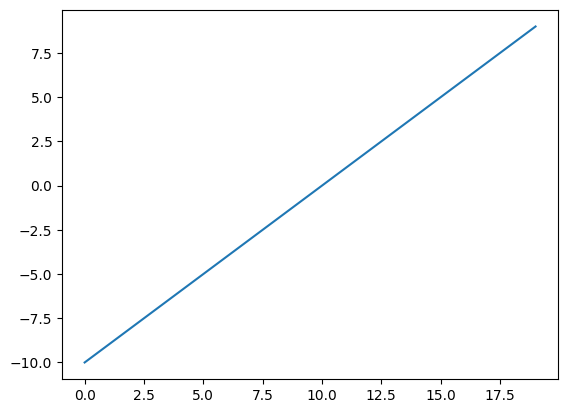

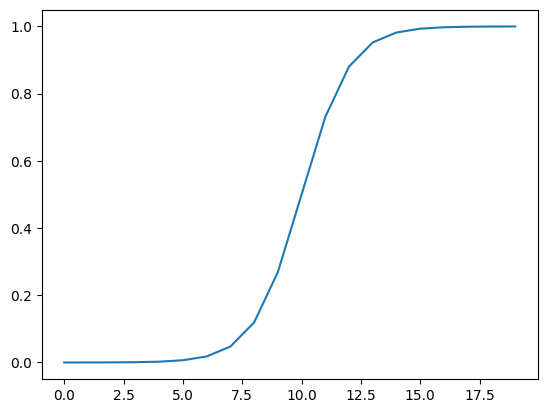

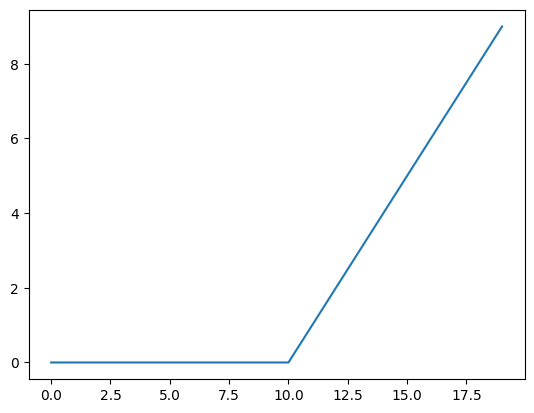

In [ ]:
# toy data demo to get used to linear and non-linear
A = tf.cast(tf.range(-10,10), tf.float32)
print("A ", A)
plt1 = plt.figure("fig1demo")
plt.plot(A)

# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
print("Sigmoid ", sigmoid(A))
plt2 = plt.figure("fig2demo")
plt.plot(sigmoid(A))

# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
print("RELU ",relu(A))
plt3 = plt.figure("fig3demo")
plt.plot(relu(A))

# Linear - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear (returns input non-modified...)
print("Linear ",tf.keras.activations.linear(A))

print("Same i.e. unchanged?")
print(A == tf.keras.activations.linear(A))


In [ ]:
# Now try splitting the data into training and testing, for predictions checking
print("Length: ", len(X))

X_train, y_train = X[:800], y[:800] # both columns, 800 of, for training
X_test, y_test = X[800:], y[800:]   # both columns, all but 800 of, for testing
# NB this is ueful notation - :800 for from zero to 800, 800: for from 800 to end

# check the shapes of X training and testing
print(X_train.shape, X_test.shape)



Length:  1000
(800, 2) (200, 2)


Now try training the model on the training data (with lightly faster learning rate and fewer epochs for now)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4515 - loss: 0.7190
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4435 - loss: 0.6969
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5150 - loss: 0.6936 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5150 - loss: 0.6929
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5115 - loss: 0.6932 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4609 - loss: 0.6933
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4627 - loss: 0.6934
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4627 - loss: 0.6934
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4755 - loss: 0.6934
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4755 - loss: 0.6934
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4755 - loss: 0.6934
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4755 - 

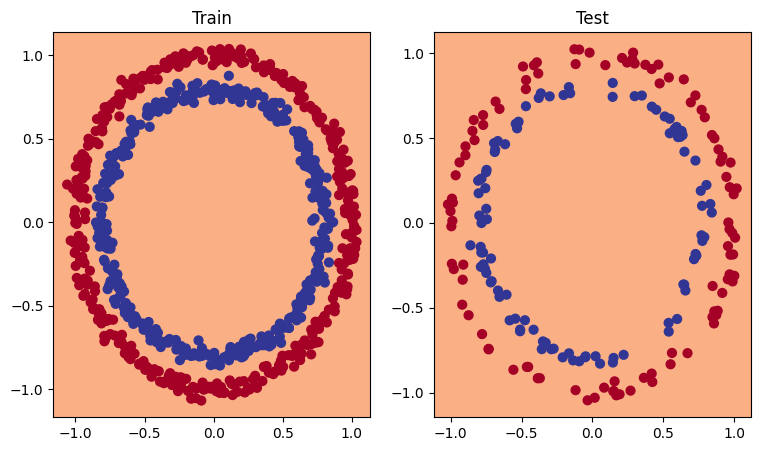

    accuracy      loss
0    0.44250  0.709284
1    0.46125  0.696990
2    0.49875  0.694172
3    0.49875  0.693300
4    0.48875  0.693271
5    0.48125  0.693278
6    0.47875  0.693283
7    0.47875  0.693286
8    0.49125  0.693286
9    0.49125  0.693287
10   0.49125  0.693287
11   0.49125  0.693287
12   0.49125  0.693287
13   0.49125  0.693287
14   0.49125  0.693288
15   0.49125  0.693288
16   0.49125  0.693288
17   0.49125  0.693288
18   0.49125  0.693288
19   0.49125  0.693288
20   0.49125  0.693288
21   0.49125  0.693288
22   0.49125  0.693288
23   0.49125  0.693288
24   0.49125  0.693288


Text(0.5, 1.0, 'Model_8 training curve (fit)')

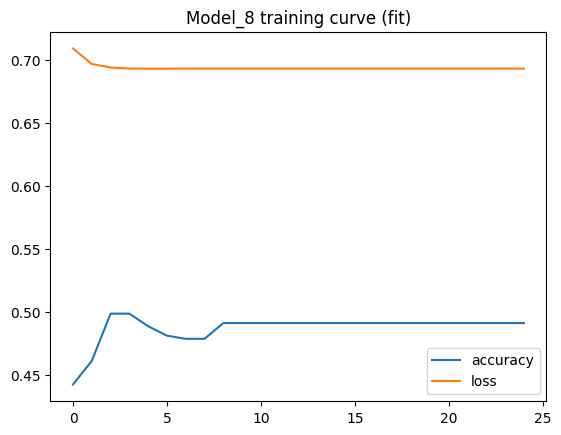

In [ ]:
tf.random.set_seed(67)

 #1 define model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # NB try model_6 with 2 hidden Rectified Linear Unit activation hidden layers
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # NB try model_6 with 2 hidden Rectified Linear Unit activation hidden layers
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # output layer activation as sigmoid   (no input layer need be specified)
])          # could just use activation = "relu" or "sigmoid"

#2 compile
model_8.compile(
    loss= tf.keras.losses.binary_crossentropy,    # not now using regression, which would have been e.g. mae as loss function
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),  # default learning rate is 0.001, increase to 0.01 for faster learning
    metrics=['accuracy']    # go back to accuracy now as metric instead of MAE (not using regression now)
)

fitting_history = model_8.fit(X_train, y_train, epochs=25)   # back to non-regression data, from circles
loss, accuracy = model_8.evaluate(X_test, y_test)   # NB evaluaTE on TEst
print(f"Model loss on test set: {loss}") # formatting inline
print(f"Model accuracy on test set: {100*accuracy:.2f}%") # formatting inline (*100 for percent .2 for 2dp)

# look at original make_circles data
#plt.scatter(X[:,0], X[:,1],c=y, cmap=plt.cm.RdYlBu)

# also use bespoke decision boundary plotting function to see results (once for train and once again for test data)
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)  # a 1x2 plot, with this as 1st col/cell
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train) # may not need X=, y= here
plt.subplot(1,2,2)  # a 1x2 plot, with this as 2nd col/cell
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show()

# and plot the loss curve by epoch (using history)
print(pd.DataFrame(fitting_history.history))
# and visualise this by plotting
pd.DataFrame(fitting_history.history).plot()
plt.title("Model_8 training curve (fit)")

NB loss not necessarily inversely linked to accuracy, but for many problems this *is* the case.

To dtermine the best learning rate (0.01, 0.0001 etc,) use a learning rate callback ....

.... together with an adapted loss curves plot (fed by callback)

(and 100 epochs up from 25 epochs, to track what's happening)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5150 - loss: 0.6853 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5150 - loss: 0.6852 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5150 - loss: 0.6850 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5150 - loss: 0.6849 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5150 - loss: 0.6848 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5150 - loss: 0.6847 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5201 - loss: 0.6845 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5289 - loss: 0.6844 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5309 - loss: 0.6842 - learning_

'\n# also use bespoke decision boundary plotting function to see results (once for train and once again for test data)\nplt.figure(figsize=(9,5))\nplt.subplot(1,2,1)  # a 1x2 plot, with this as 1st col/cell\nplt.title("Train")\nplot_decision_boundary(model_9, X_train, y_train) # may not need X=, y= here\nplt.subplot(1,2,2)  # a 1x2 plot, with this as 2nd col/cell\nplt.title("Test")\nplot_decision_boundary(model_9, X_test, y_test)\nplt.show()\n\n# and plot the loss curve by epoch (using history)\nprint(pd.DataFrame(fitting_history.history))\n# and visualise this by plotting\npd.DataFrame(fitting_history.history).plot()\nplt.title("Model_8 training curve (fit)")\n'

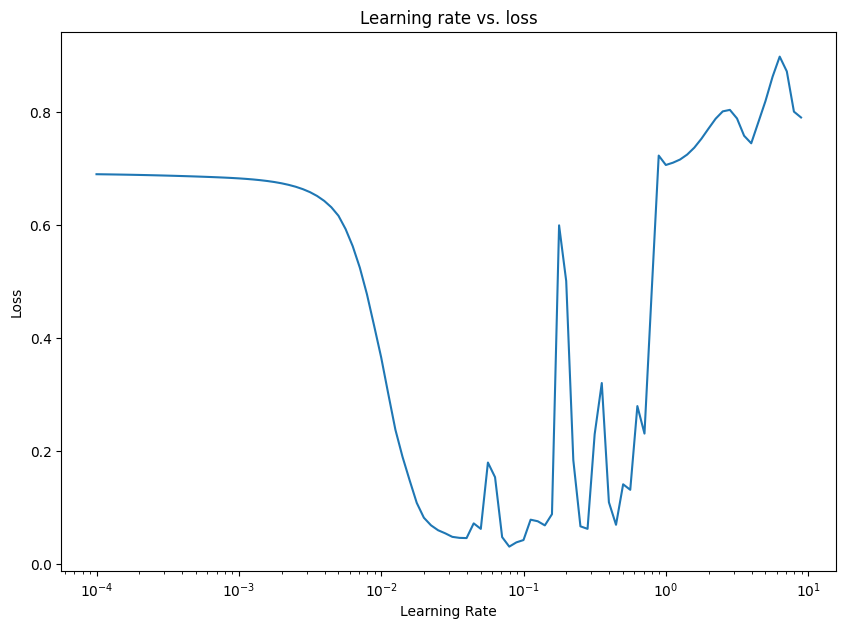

In [ ]:
tf.random.set_seed(67)

 #1 define model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"), # NB try model_6 with 2 hidden Rectified Linear Unit activation hidden layers
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # NB try model_6 with 2 hidden Rectified Linear Unit activation hidden layers
    tf.keras.layers.Dense(1, activation="sigmoid") # output layer activation as sigmoid   (no input layer need be specified)
])          # could just use activation = "relu" or "sigmoid" or tf.keras.activations.relu &c

#2 compile
model_9.compile(
    loss= tf.keras.losses.binary_crossentropy,    # not now using regression, which would have been e.g. mae as loss function
    #optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),  # default learning rate is 0.001, increase to 0.01 for faster learning
    optimizer = "Adam",
    metrics=['accuracy']    # go back to accuracy now as metric instead of MAE (not using regression now)
)

# HERE DEFINE THE LEARNING RATE CALLBACK

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# "traverse a set of learning rate values starting from 1e-4 increasing by 10**(epoch/20) every epoch"

fitting_history = model_9.fit(X_train, y_train, epochs=100, callbacks=lr_scheduler)
# specify callback fr learning-rate inside 'fit' stage
loss, accuracy = model_9.evaluate(X_test, y_test)   # NB evaluaTE on TEst
print(f"Model loss on test set: {loss}") # formatting inline
print(f"Model accuracy on test set: {100*accuracy:.2f}%") # formatting inline (*100 for percent .2 for 2dp)

#Plot the learning rate vs the loss, with learning rate on log scale x-axis
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, fitting_history.history["loss"])  # log scale on x axis (Learning Rate value)
# USE CALLBACK FUNCTION VALUE HERE, AND DICTIONARY 'loss' FROM FIT HISTORY
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")
"""
# also use bespoke decision boundary plotting function to see results (once for train and once again for test data)
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)  # a 1x2 plot, with this as 1st col/cell
plt.title("Train")
plot_decision_boundary(model_9, X_train, y_train) # may not need X=, y= here
plt.subplot(1,2,2)  # a 1x2 plot, with this as 2nd col/cell
plt.title("Test")
plot_decision_boundary(model_9, X_test, y_test)
plt.show()

# and plot the loss curve by epoch (using history)
print(pd.DataFrame(fitting_history.history))
# and visualise this by plotting
pd.DataFrame(fitting_history.history).plot()
plt.title("Model_8 training curve (fit)")
"""

"*The ideal learning rate at the start of model training is somewhere just before the loss curve bottoms out (a value where the loss is still decreasing).*"
This would appear to be at about 10^-2, the tutorial has 2*10^-2, or 0.02, so might as well use this.

Actually my data (seed 67 not 42) bottoming out a bit earlier, though could be the inflection is about there anyway at about 2*10^-2.

Having manually observed an 'ideal' (inflection) learning rate on the chart/plot, alter code to re-fit the model using this value of learning rate.

This will be another model (model_10, after model_9 above)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4823 - loss: 0.7002
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5313 - loss: 0.6841 
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5720 - loss: 0.6711 
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6018 - loss: 0.6541 
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6711 - loss: 0.6231  
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7854 - loss: 0.5503  
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8487 - loss: 0.4619 
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9031 - loss: 0.3639 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9489 - loss: 0.2677  
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9580 - loss: 0.2120 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9673 - loss: 0.1668 
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

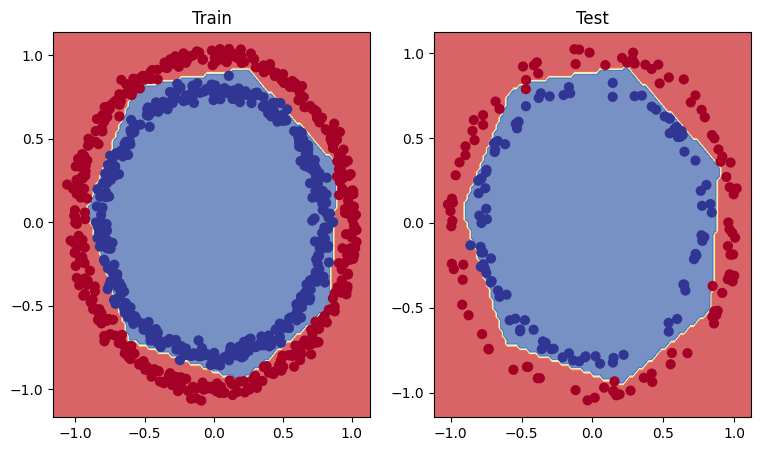

    accuracy      loss
0    0.52375  0.693360
1    0.54875  0.679339
2    0.60625  0.666326
3    0.65750  0.648316
4    0.69000  0.614753
5    0.78250  0.544615
6    0.84750  0.448266
7    0.92750  0.339175
8    0.95250  0.249787
9    0.96625  0.191430
10   0.97500  0.148910
11   0.98250  0.120058
12   0.98375  0.101468
13   0.98625  0.088847
14   0.98625  0.079871
15   0.98750  0.073146
16   0.98375  0.068686
17   0.98375  0.065477
18   0.98250  0.061792
19   0.98375  0.057522


'\n#Plot the learning rate vs the loss, with learning rate on log scale x-axis\nlrs = 1e-4 * (10 ** (np.arange(100)/20))\nplt.figure(figsize=(10,7))\nplt.semilogx(lrs, fitting_history.history["loss"])  # log scale on x axis (Learning Rate value)\n# USE CALLBACK FUNCTION VALUE HERE, AND DICTIONARY \'loss\' FROM FIT HISTORY\nplt.xlabel("Learning Rate")\nplt.ylabel("Loss")\nplt.title("Learning rate vs. loss")'

<Figure size 900x500 with 0 Axes>

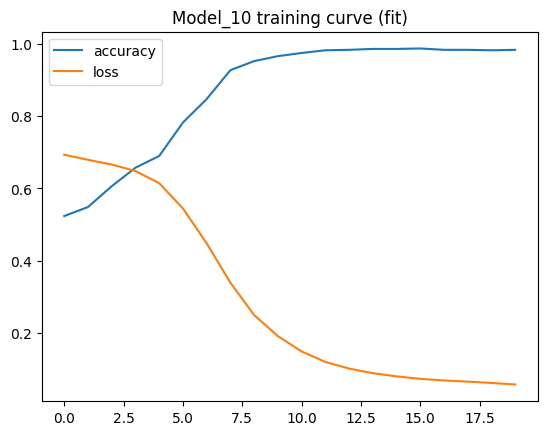

In [ ]:
tf.random.set_seed(67)

 #1 define model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"), # NB try model_6 with 2 hidden Rectified Linear Unit activation hidden layers
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # NB try model_6 with 2 hidden Rectified Linear Unit activation hidden layers
    tf.keras.layers.Dense(1, activation="sigmoid") # output layer activation as sigmoid   (no input layer need be specified)
])          # could just use activation = "relu" or "sigmoid" or tf.keras.activations.relu &c

#2 compile
model_10.compile(
    loss= tf.keras.losses.binary_crossentropy,    # not now using regression, which would have been e.g. mae as loss function
    #optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),  # default learning rate is 0.001, increase to 0.01 for faster learning
    #optimizer = "Adam",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),  # use manually-identified 'ideal' learning_rate 0.02 (NB not 'Adam')
    metrics=['accuracy']    # go back to accuracy now as metric instead of MAE (not using regression now)
)

# HERE DEFINE THE LEARNING RATE CALLBACK

#Don't need the learning rate callback if the ideal learning rate value has now been identified
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# "traverse a set of learning rate values starting from 1e-4 increasing by 10**(epoch/20) every epoch"

# reduce epochs to 20 as likely good fitting pretty soon
#fitting_history = model_10.fit(X_train, y_train, epochs=20, callbacks=lr_scheduler)
fitting_history = model_10.fit(X_train, y_train, epochs=20)
# specify callback fr learning-rate inside 'fit' stage NOT NEEDED ONCE IDEAL LEARNING RATE IDENTIFIED
loss, accuracy = model_10.evaluate(X_test, y_test)   # NB evaluaTE on TEst
print(f"Model loss on test set: {loss}") # formatting inline
print(f"Model accuracy on test set: {100*accuracy:.2f}%") # formatting inline (*100 for percent .2 for 2dp)

# also use bespoke decision boundary plotting function to see results (once for train and once again for test data)
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)  # a 1x2 plot, with this as 1st col/cell
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train) # may not need X=, y= here
plt.subplot(1,2,2)  # a 1x2 plot, with this as 2nd col/cell
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)
plt.show()

plt.figure(figsize=(9,5))
# and plot the loss curve by epoch (using history)
print(pd.DataFrame(fitting_history.history))
# and visualise this by plotting
pd.DataFrame(fitting_history.history).plot()
plt.title("Model_10 training curve (fit)")

"""
#Plot the learning rate vs the loss, with learning rate on log scale x-axis
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, fitting_history.history["loss"])  # log scale on x axis (Learning Rate value)
# USE CALLBACK FUNCTION VALUE HERE, AND DICTIONARY 'loss' FROM FIT HISTORY
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")"""

Slightly higher accuracy rate reached with the ideal learning rate of 0.02 viz 0.01 (in same number of epochs) i.e. worth finding out.

Plots were wonky (1 colour only) for model_10 as a different .plot() command followed for learning loss/accuracy graph - using a new figure() (or commenting-out) helped.

Various means of evaluating claification:

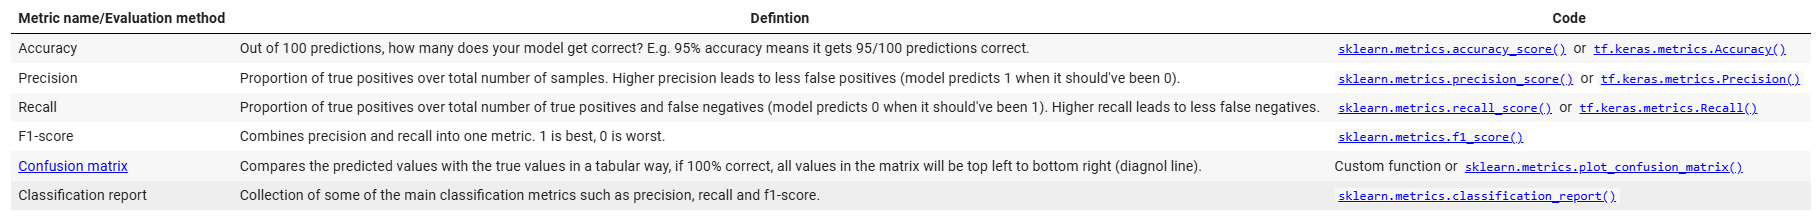

Try-out confusion matrix (built in) - predicted vs true, in a table


In [ ]:
from sklearn.metrics import confusion_matrix

# to start, predict, on testing data
y_preds = model_10.predict(X_test)

# from prediction, generate confusion matrix (of y actual (test, not train) vs y predicted)
#confusion_matrix(y_test, y_preds)
# predictions must be not in current floating point prediction probabilities,
# - instead, for binary, need to match the test labels, which are 0 or 1 (for inner or outer make_circle)
# - the floats can be rounded up or down to 0 or 1
print("y_preds: ", y_preds[:10])
print("y_test: ", y_test[:10])
#y_test_rounded = tf.round(y_test)
print("y_test rounded - ok as 0 or 1? ",  tf.round(y_preds[:10]))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
y_preds:  [[9.1413850e-01]
 [9.9991518e-01]
 [9.1597193e-01]
 [9.1475010e-01]
 [3.2824546e-02]
 [1.0366867e-03]
 [9.8414183e-01]
 [6.9577241e-04]
 [9.9813259e-01]
 [5.9682090e-02]]
y_test:  [1 1 1 1 0 0 1 0 1 0]
y_test rounded - ok as 0 or 1?  tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]], shape=(10, 1), dtype=float32)


Yes, we can use tf.round to get the rounded 0 or 1 values.

In [ ]:
confusion_matrix(y_test, tf.round(y_preds))

array([[98,  3],
       [ 2, 97]])

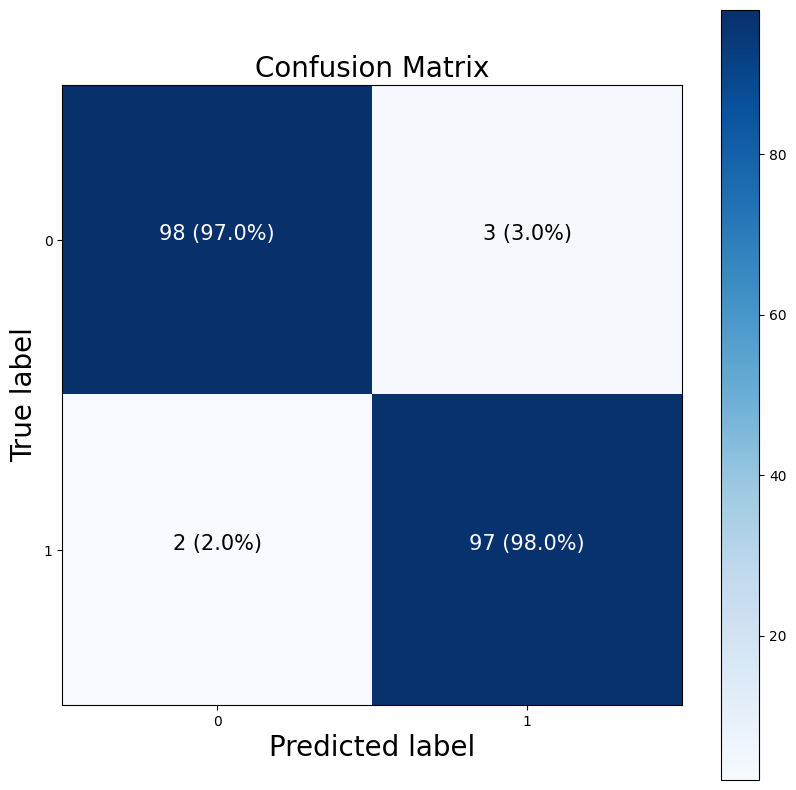

In [ ]:
# BESPOKE CONFUSION MATRIX CODE
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

That confusion matrix bespoke code is clearly working for a smaller dataset (binary classification) .....

Now use the built-in MNIST fashion image dataset to try a *multi*-classification application of a confusion matrix, to evaluate classification.



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109 

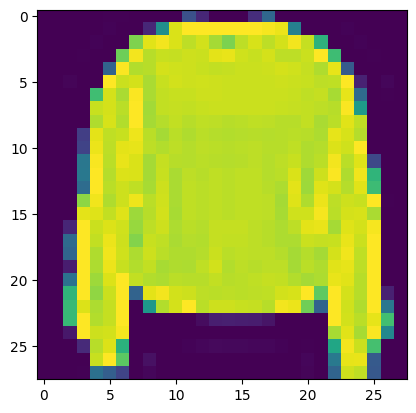

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# just heave the built-in practice dataset (fashion clothing images) into variables
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
# and have a look at the data (features and labels, in matrix form)
# first item of each
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training labels: \n{train_labels[0]}\n")

# check the shape
print(f"Train-ing data features shape: {train_data.shape}")
print(f"Test data features shape: {test_data.shape}")
print(f"Train-ing data labels shape: {train_labels.shape}")
print(f"Test data labels shape: {test_labels.shape}")

# ... and check the shape of a single data item
print(f"A single train-ing data feature's shape: {train_data[0].shape}")
print(f"A single train-ing data label's shape: {test_data[0].shape}")

# try plotting a single example of the training data (say the 8th [7])
import matplotlib.pyplot as plt
# use imshow to display plot as bitmap
plt.imshow(train_data[7])
print(train_labels[7])

# class names from the MNIST dataset github page https://github.com/zalandoresearch/fashion-mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# just to check, should be 10 class names
print("Number of class names:", len(class_names))

This is an image from the database.
Class names are fom the 'Labels' section about a quarter of the way down https://github.com/zalandoresearch/fashion-mnist

Now try plotting another image, to visualise, in black & white

0


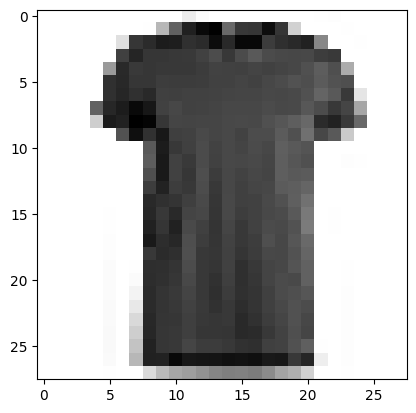

In [ ]:
# show the 18th item [17]
plt.imshow(train_data[17], cmap=plt.cm.binary)
print(train_labels[17])


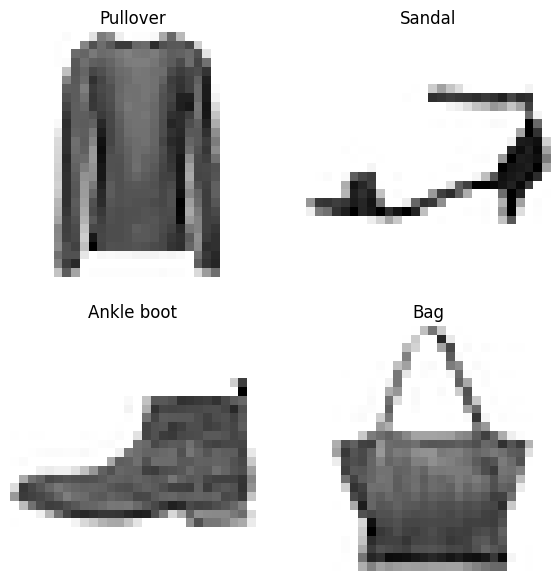

In [ ]:
# Now plot a random selection of images from among the train_data
import random
plt.figure(figsize=(7,7))
for i in range(4):    # 4 items
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data))) # get a random train_data image
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])  # use title of sub-plot to show corresponding randomised label text
  plt.axis(False) # ??? turn off all axis decorations

Now build a model to correlate pixel value with labels (i.e. images (of clothing) with labels) - a multi-classification

* input shape will need tensors of size of image (28x28 pixels) NB 28*28=784
* output shape will need to be 10, a binary bitmap of 10 possibilities for the 10 difference possible classes. As a result, the output activation layer, instead of 'sigmoid' for binary classification, will be needed to be 'softmax' (normalised 0-1) likelihood (highest likelihood value is to be selected)
* loss function will need to be multiclass - since labels (0,1,2,...) for classes are integers, SparseCategoricalCrossentropy() will be needed (if classes had been binary one-hot encoded, tf.keras.losses.CategoricalCrossentropy() would have been needed).
* *validation_data* used in *fit* with *test_data* and *test_labels* will help evaluation of the model's performance

Using the above to build model_11 (tweaking model_10)

In [ ]:
tf.random.set_seed(67)

 #1 define model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # add input layer, as Flatten layer, to reshape 28x28 to 1x784
    tf.keras.layers.Dense(4, activation="relu"), # NB try model_6 with 2 hidden Rectified Linear Unit activation hidden layers
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # NB try model_6 with 2 hidden Rectified Linear Unit activation hidden layers
    tf.keras.layers.Dense(10, activation="softmax") # output layer activation as softmax (0..1) (NB need 10 neurons in output layer for range of 10 classes)
])          # could just use activation = "relu" or "sigmoid" or tf.keras.activations.relu &c

#2 compile
model_11.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),    # SparseCategoricalCrossentropy for integers as labels
    #optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),  # default learning rate is 0.001, increase to 0.01 for faster learning
    optimizer = tf.keras.optimizers.Adam(),  # use manually-identified 'ideal' learning_rate 0.02 (NB not 'Adam')
    metrics=['accuracy']    # go back to accuracy now as metric instead of MAE (not using regression now)
                )

# HERE DEFINE THE LEARNING RATE CALLBACK

#Don't need the learning rate callback if the ideal learning rate value has now been identified
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# "traverse a set of learning rate values starting from 1e-4 increasing by 10**(epoch/20) every epoch"

# reduce epochs to 20 as likely good fitting pretty soon
#fitting_history = model_10.fit(X_train, y_train, epochs=20, callbacks=lr_scheduler)
non_normalised_fitting_history = model_11.fit(train_data, train_labels, epochs=10, validation_data=(test_data,test_labels))

model_11.summary()


"""
# specify callback fr learning-rate inside 'fit' stage NOT NEEDED ONCE IDEAL LEARNING RATE IDENTIFIED
loss, accuracy = model_11.evaluate(X_test, y_test)   # NB evaluaTE on TEst
print(f"Model loss on test set: {loss}") # formatting inline
print(f"Model accuracy on test set: {100*accuracy:.2f}%") # formatting inline (*100 for percent .2 for 2dp)

# also use bespoke decision boundary plotting function to see results (once for train and once again for test data)
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)  # a 1x2 plot, with this as 1st col/cell
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train) # may not need X=, y= here
plt.subplot(1,2,2)  # a 1x2 plot, with this as 2nd col/cell
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)
plt.show()

plt.figure(figsize=(9,5))
# and plot the loss curve by epoch (using history)
print(pd.DataFrame(fitting_history.history))
# and visualise this by plotting
pd.DataFrame(fitting_history.history).plot()
plt.title("Model_10 training curve (fit)")
"""

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0979 - loss: 3.3190 - val_accuracy: 0.1000 - val_loss: 2.3035
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0981 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0987 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0980 - loss: 2.3024 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0984 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0980 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0980 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0980 - loss: 2.3027 - val_accurac

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

'\n# specify callback fr learning-rate inside \'fit\' stage NOT NEEDED ONCE IDEAL LEARNING RATE IDENTIFIED\nloss, accuracy = model_11.evaluate(X_test, y_test)   # NB evaluaTE on TEst\nprint(f"Model loss on test set: {loss}") # formatting inline\nprint(f"Model accuracy on test set: {100*accuracy:.2f}%") # formatting inline (*100 for percent .2 for 2dp)\n\n# also use bespoke decision boundary plotting function to see results (once for train and once again for test data)\nplt.figure(figsize=(9,5))\nplt.subplot(1,2,1)  # a 1x2 plot, with this as 1st col/cell\nplt.title("Train")\nplot_decision_boundary(model_10, X_train, y_train) # may not need X=, y= here\nplt.subplot(1,2,2)  # a 1x2 plot, with this as 2nd col/cell\nplt.title("Test")\nplot_decision_boundary(model_10, X_test, y_test)\nplt.show()\n\nplt.figure(figsize=(9,5))\n# and plot the loss curve by epoch (using history)\nprint(pd.DataFrame(fitting_history.history))\n# and visualise this by plotting\npd.DataFrame(fitting_history.history

Getting to about 0.2608 = about 26% accuracy     (random seed was 67)

Try scaling, and normalisation (e.g. of pixel values 0-255) to between 0..1 of all (feature) data as *feature scaling* - just divide by its maximum (possible? e.g. 255) value, ...
... and then feed this value into the (same) model fit.

In [ ]:
# feature scale the data manually
MAX_VALUE = 255
feature_scaled_train_data = train_data / MAX_VALUE
feature_scaled_test_data = test_data / MAX_VALUE

# Check min & max
print("min(feature_scaled_train_data): ", feature_scaled_train_data.min())
print("max(feature_scaled_train_data): ", feature_scaled_train_data.max())

# OOPS - NO NEED/PURPOSE/SENSE TO SCALE LABELS TOO
print("min(feature_scaled_test_data): ", feature_scaled_test_data.min())
print("max(feature_scaled_test_data): ", feature_scaled_test_data.max())

min(feature_scaled_train_data):  0.0
max(feature_scaled_train_data):  1.0
min(feature_scaled_test_data):  0.0
max(feature_scaled_test_data):  1.0


In [ ]:
tf.random.set_seed(67)

 #1 define model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # add input layer, as Flatten layer, to reshape 28x28 to 1x784
    tf.keras.layers.Dense(4, activation="relu"), # NB try model_6 with 2 hidden Rectified Linear Unit activation hidden layers
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # NB try model_6 with 2 hidden Rectified Linear Unit activation hidden layers
    tf.keras.layers.Dense(10, activation="softmax") # output layer activation as softmax (0..1) (NB need 10 neurons in output layer for range of 10 classes)
])          # could just use activation = "relu" or "sigmoid" or tf.keras.activations.relu &c

#2 compile
model_12.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),    # SparseCategoricalCrossentropy for integers as labels
    #optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),  # default learning rate is 0.001, increase to 0.01 for faster learning
    optimizer = tf.keras.optimizers.Adam(),  # use manually-identified 'ideal' learning_rate 0.02 (NB not 'Adam')
    metrics=['accuracy']    # go back to accuracy now as metric instead of MAE (not using regression now)
                )

normalised_fitting_history = model_12.fit(feature_scaled_train_data,
                                        train_labels, epochs=10,
                                        validation_data=(feature_scaled_test_data,
                                                         test_labels))

model_12.summary()

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3593 - loss: 1.6992 - val_accuracy: 0.6249 - val_loss: 0.9676
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6782 - loss: 0.8399 - val_accuracy: 0.7299 - val_loss: 0.7255
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7482 - loss: 0.6818 - val_accuracy: 0.7418 - val_loss: 0.6862
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7631 - loss: 0.6391 - val_accuracy: 0.7530 - val_loss: 0.6635
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7726 - loss: 0.6159 - val_accuracy: 0.7555 - val_loss: 0.6498
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7792 - loss: 0.6005 - val_accuracy: 0.7595 - val_loss: 0.6395
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7828 - loss: 0.5902 - val_accuracy: 0.7616 - val_loss: 0.6339
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7862 - loss: 0.5830 - 

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

<Axes: title={'center': 'Feature-scaled/normalised fitting history'}>

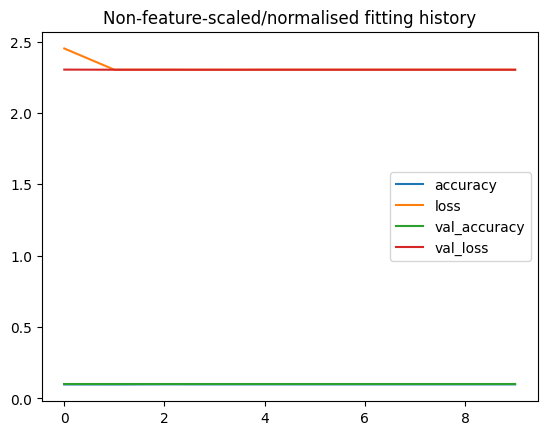

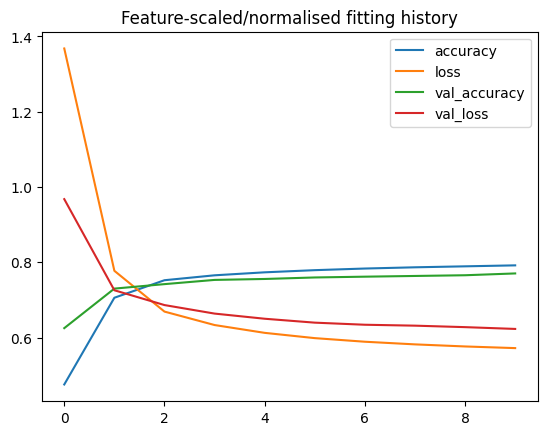

In [ ]:
# now visualise the loss curves for both non-feature-scaled and for feature-scaled/normalised

import pandas as pd

pd.DataFrame(non_normalised_fitting_history.history).plot(title="Non-feature-scaled/normalised fitting history")
# and then in contrast....
pd.DataFrame(normalised_fitting_history.history).plot(title="Feature-scaled/normalised fitting history")

Plots including use of validation_data in fit (first is wonky?)

To try improving accuracy, try to find the ideal/inflection learning rate as before (use same-ish code with callback).

And a few more epochs just in case to help make a nice big learning rate graph!

In [ ]:
tf.random.set_seed(67)

 #1 define model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # add input layer, as Flatten layer, to reshape 28x28 to 1x784
    tf.keras.layers.Dense(4, activation="relu"), # NB try model_6 with 2 hidden Rectified Linear Unit activation hidden layers
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # NB try model_6 with 2 hidden Rectified Linear Unit activation hidden layers
    tf.keras.layers.Dense(10, activation="softmax") # output layer activation as softmax (0..1) (NB need 10 neurons in output layer for range of 10 classes)
])          # could just use activation = "relu" or "sigmoid" or tf.keras.activations.relu &c

# HERE DEFINE THE LEARNING RATE CALLBACK

#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
# HOW TO KNOW WHAT VALUE OF EPOCH TO TRAVERSE TO SEE FULL U CURVE & DETAILS??
# "traverse a set of learning rate values starting from 1e-4 increasing by 10**(epoch/20) every epoch"



#2 compile
model_13.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),    # SparseCategoricalCrossentropy for integers as labels
    #optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),  # default learning rate is 0.001, increase to 0.01 for faster learning
    optimizer = tf.keras.optimizers.Adam(),  # use manually-identified 'ideal' learning_rate 0.02 (NB not 'Adam')
    metrics=['accuracy']    # go back to accuracy now as metric instead of MAE (not using regression now)
                )

# this time including callbacks in fit to provide data to find ideal learning rate
normalised_fitting_history = model_13.fit(feature_scaled_train_data,
                                        train_labels, epochs=40,
                                        validation_data=(feature_scaled_test_data,
                                                         test_labels),
                                          callbacks = [lr_scheduler])

model_13.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3960 - loss: 1.6672 - val_accuracy: 0.6475 - val_loss: 0.8921 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6754 - loss: 0.8178 - val_accuracy: 0.7009 - val_loss: 0.7560 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7120 - loss: 0.7170 - val_accuracy: 0.7269 - val_loss: 0.7163 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7311 - loss: 0.6852 - val_accuracy: 0.7363 - val_loss: 0.7010 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7456 - loss: 0.6686 - val_accuracy: 0.7497 - val_loss: 0.6874 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7633 - loss: 0.6489 - val_accuracy: 0.7605 - val_loss: 0.6894 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7795 - l

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

Text(0.5, 1.0, 'Learning rate vs. loss')

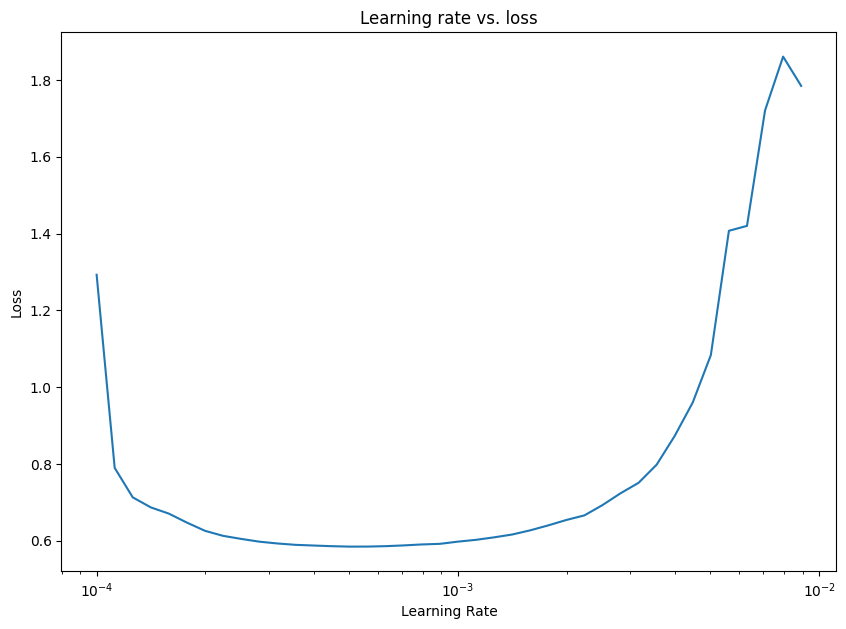

In [ ]:
# Refactor/fettle previous learning rate plot code
#Plot the learning rate vs the loss, with learning rate on log scale x-axis
import numpy as np
import matplotlib.pyplot as plt

# HOW TO KNOW WHAT VALUE OF EPOCH TO TRAVERSE TO SEE FULL U CURVE & DETAILS??
lrs = 1e-4 * (10 ** (np.arange(40)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, normalised_fitting_history.history["loss"])  # log scale on x axis (Learning Rate value)
# USE CALLBACK FUNCTION VALUE HERE, AND DICTIONARY 'loss' FROM FIT HISTORY
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")
# good to go

Text(0.5, 1.0, 'Learning rate vs. loss')

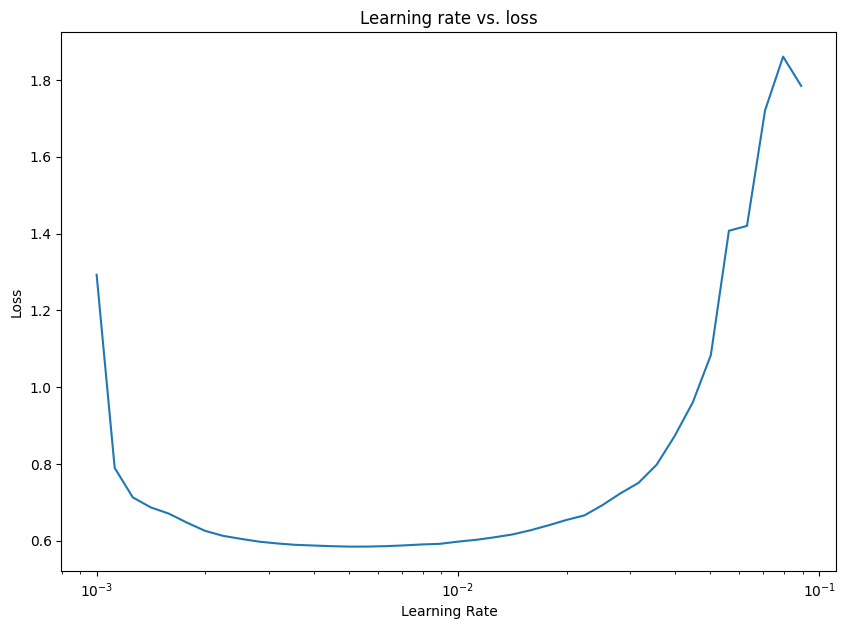

In [ ]:
# Refactor/fettle previous learning rate plot code
#Plot the learning rate vs the loss, with learning rate on log scale x-axis
import numpy as np
import matplotlib.pyplot as plt

# HOW TO KNOW WHAT VALUE OF EPOCH TO TRAVERSE TO SEE FULL U CURVE & DETAILS??
lrs = 1e-3 * (10 ** (np.arange(40)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, normalised_fitting_history.history["loss"])  # log scale on x axis (Learning Rate value)
# USE CALLBACK FUNCTION VALUE HERE, AND DICTIONARY 'loss' FROM FIT HISTORY
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")
# good to go

The line d'start veering from vertical on the left between about 1*10^-3 and 2*10^-3, so say this is near enough about 1*10^-3 which is the default Adam learning rate anyhow (0.001). Use this learning rate inflection value in the model with 20 epochs to see if a good-ish classification success is achieved, according to validation accuracy metric.

In [ ]:
tf.random.set_seed(67)

 #1 define model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # add input layer, as Flatten layer, to reshape 28x28 to 1x784
    tf.keras.layers.Dense(4, activation="relu"), # NB try model_6 with 2 hidden Rectified Linear Unit activation hidden layers
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # NB try model_6 with 2 hidden Rectified Linear Unit activation hidden layers
    tf.keras.layers.Dense(10, activation="softmax") # output layer activation as softmax (0..1) (NB need 10 neurons in output layer for range of 10 classes)
])          # could just use activation = "relu" or "sigmoid" or tf.keras.activations.relu &c

# HERE DEFINE THE LEARNING RATE CALLBACK

#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
# HOW TO KNOW WHAT VALUE OF EPOCH TO TRAVERSE TO SEE FULL U CURVE & DETAILS??
# "traverse a set of learning rate values starting from 1e-4 increasing by 10**(epoch/20) every epoch"
# DON@T REALLY NEED THIS HAVING GOTTEN A CHART TO IDENTIFY LEARNING RATE



#2 compile
model_14.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),    # SparseCategoricalCrossentropy for integers as labels
    #optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),  # default learning rate is 0.001, increase to 0.01 for faster learning
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),  # use recently manually-identified 'ideal' Adam learning_rate of 0.001
    metrics=['accuracy']    # go back to accuracy now as metric instead of MAE (not using regression now)
                )

# this time including callbacks in fit to provide data to find ideal learning rate
ideal_lr_fitting_history = model_14.fit(feature_scaled_train_data,
                                        train_labels, epochs=20,
                                        validation_data=(feature_scaled_test_data,
                                                         test_labels),
                                          callbacks = [lr_scheduler])


model_14.summary()

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2630 - loss: 1.8165 - val_accuracy: 0.5656 - val_loss: 1.0589 - learning_rate: 0.0010
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6125 - loss: 0.9656 - val_accuracy: 0.6335 - val_loss: 0.8989 - learning_rate: 0.0011
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6527 - loss: 0.8474 - val_accuracy: 0.6585 - val_loss: 0.8451 - learning_rate: 0.0013
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6671 - loss: 0.7995 - val_accuracy: 0.6890 - val_loss: 0.7994 - learning_rate: 0.0014
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7367 - loss: 0.7275 - val_accuracy: 0.7370 - val_loss: 0.7159 - learning_rate: 0.0016
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7570 - loss: 0.6755 - val_accuracy: 0.7475 - val_loss: 0.6855 - learning_rate: 0.0018
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7668 - l

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

Accuracy either 81% or by validation 73%.

To evaluate this in more detail, use bespoke confusion matrix code from the tutorial page https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/02_neural_network_classification_in_tensorflow.ipynb#scrollTo=jK4zA47sYVp5

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

... and we have to make predictions to provide input data for the confusion matrix (against actual test data)

In [ ]:
# use most recent/best yet model (model_14) for the predictions
y_probabilities = model_14.predict(test_data) # NB highest probability is the one (class) selected for each prediction

# view first 5 probabilities
print("Probabilities: ",y_probabilities[:5]) # from zero to 5

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Probabilities:  [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9999994e-01]
 [0.0000000e+00 0.0000000e+00 9.9999994e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.7243493e-03 9.6628350e-01 1.8161089e-03 2.4414137e-02 2.2848591e-03
  6.7605643e-04 1.7367668e-03 1.4304930e-05 4.8308113e-05 1.7274260e-06]
 [2.7243493e-03 9.6628350e-01 1.8161089e-03 2.4414137e-02 2.2848591e-03
  6.7605643e-04 1.7367668e-03 1.4304930e-05 4.8308113e-05 1.7274260e-06]
 [0.0000000e+00 0.0000000e+00 8.6093913e-25 0.0000000e+00 0.0000000e+00
  0.0000000e+00 9.9999994e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [ ]:
# See the predicted class number and label for the first example
y_probabilities[0].argmax(), class_names[y_probabilities[0].argmax()]

# Convert all of the predictions from probabilities to labels
y_preds = y_probabilities.argmax(axis=1)

# View the first 10 prediction labels
print(y_preds[:10])

[9 2 1 1 6 1 4 8 9 8]


In [ ]:
# view the basic numeric confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[  4,  22,  59,   0,   4,   1,  51,   0, 858,   1],
       [  0, 958,  28,   0,   2,   0,   3,   0,   9,   0],
       [  1,   3, 796,   0,  84,   0,  55,   0,  60,   1],
       [ 18, 175, 649,   7,  28,   0,  29,   0,  91,   3],
       [  0,   1, 306,   0, 560,   0,  30,   0, 101,   2],
       [  0,   1,   0,   0,   0,   0,   0,   0, 107, 892],
       [  5,   9, 209,   0, 115,   0, 210,   0, 450,   2],
       [  0,   0,   0,   0,   0,   0,   0,   0, 488, 512],
       [  1,   1,   5,   0,   3,   0,  16,   0, 955,  19],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2, 998]])

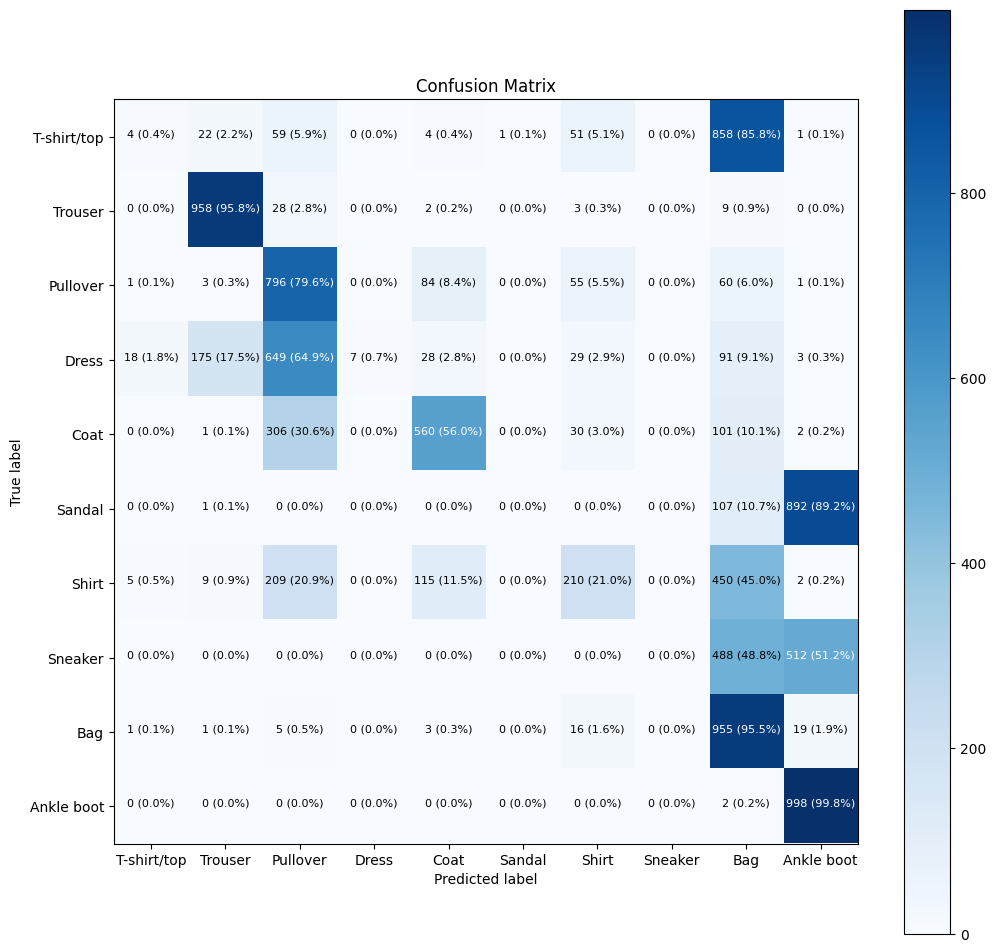

In [ ]:
# Use bespoke graphical confusion matrix code from earlier to visualise
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(12,12),
                      text_size=8)

Varies a little on each run.

Not looking bad at all.

Diagonal = (or would be) nice

shirt and T-shirt most confused


Now to plot random image and probability/confidence...

In [ ]:
# BESPOKE CODE FROM TUTORIAL, TO PRINT RANDOM IMAGE & INFO

import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


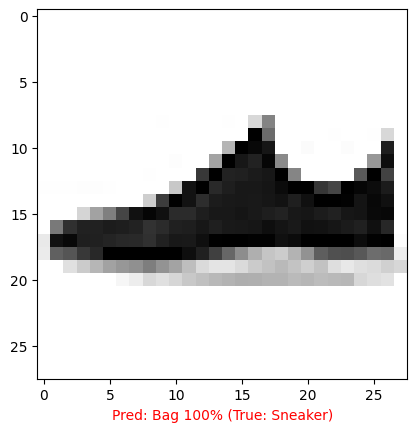

In [ ]:
# CALLING THIS BESPOKE CODE
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

That's all for the model optimisation for multi-class classification.

Now consider how the latest model (model_14) has ended up - what's inside.

Look at the layers, then get the *weights **bold text** matrix* (inputs * neurons) and the *bias **bold text** vector* (to inputs) - known as the *pattern*.

(All values initialised as random cf normal vs uniform)

Each model layer (input, hidden..., output) has its own weights and biases (and its own number of neurons).

[<Flatten name=flatten_3, built=True>, <Dense name=dense_37, built=True>, <Dense name=dense_38, built=True>, <Dense name=dense_39, built=True>]
[<Flatten name=flatten_3, built=True>, <Dense name=dense_37, built=True>, <Dense name=dense_38, built=True>, <Dense name=dense_39, built=True>]
[[ 5.1362634e-02 -8.8039488e-01  2.8136545e-01  1.3306803e-01]
 [ 2.8311439e-02 -3.2175777e+00 -3.3736742e+00 -1.1325533e+00]
 [-7.4779540e-03 -1.6008371e+00 -7.2971117e-01 -1.7219003e+00]
 ...
 [-8.1584603e-02 -1.4114003e-03 -1.0773929e+00 -4.4076830e-01]
 [-5.0491437e-02  7.3715109e-01 -2.4529285e+00  8.9637494e-01]
 [-4.2736828e-02 -6.6323262e-01 -1.2642639e+00  3.6157539e-01]] (784, 4)
[-0.04242435  4.734503    4.786788    4.6846604 ] (4,)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

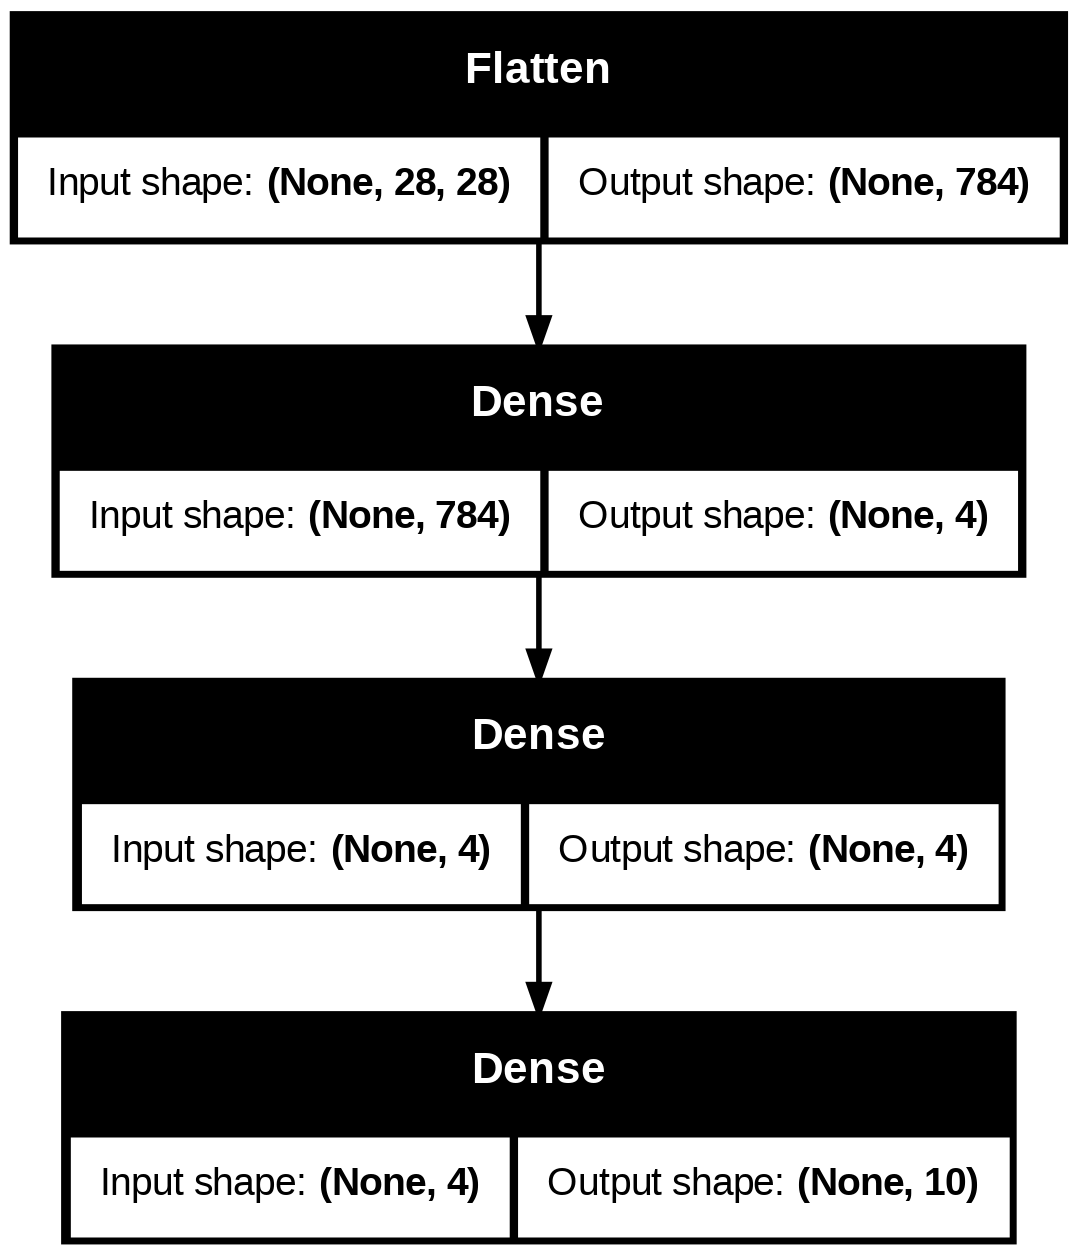

In [ ]:
# see the model's layers
print(model_14.layers)

# see a particular layer (the first layer) (an input layer))
print(model_14.layers)

weights, biases = model_14.layers[1].get_weights()

print(weights, weights.shape)

# 784 (28x28) pixels input with 4 neurons

# 1 bias per neuron
print(biases, biases.shape)

model_14.summary()

from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)



**Backpropagation** is using the real labels as a reference to self-improve over successive epochs.




From   https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true

Homework - Try coding this:

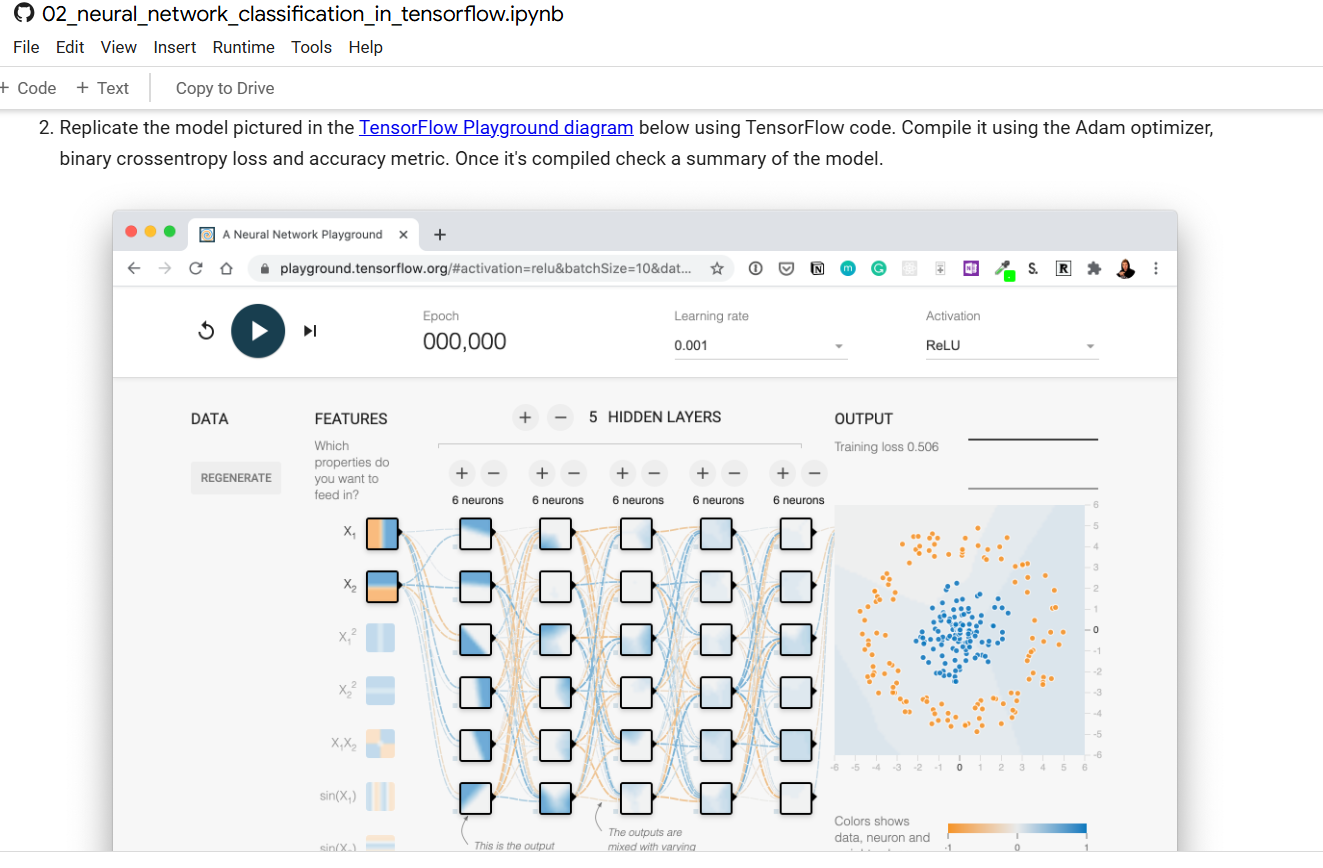

In [ ]:
# has 2 input layers (2 features e.g. 2 pixels, 2 shapes e.g. circles), and 5 hidden layers of 6 neurons, all ReLU activation, LR 0.001
# output layer not shown - should probably be 1 neuron for a binary yes/no, on/off solution

from tensorflow.keras.utils import plot_model

# Set random seed
tf.random.set_seed(67)


"""
# Create some regression data (for trying this out on model to see if it'll get better accuracy)
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)  # standard straight line of X vs y

# Split it into training and test sets
X_reg_train = X_regression[:150]    # 150 of 1000
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]
"""

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)


# 1 define
model_homework = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # sigmoid best for binary classification, which this is
])

#2 compile
model_homework.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    #loss=tf.keras.losses.mae, # change model loss function (to optimise) back to regression
    #optimizer=tf.keras.optimizers.SGD(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
    #metrics = ['mae'] # go back to MAE (rather than accuracy) as a metric for this regression
)

# 3 fit
#model_3.fit(X,y,epochs=100)
# Use X_train and so on noisy make_circle data, not regression data (as per playground data)

model_homework.fit(X_train , y_train, epochs=100)
# no need for tf.expand_dims with make_circle output

model_homework.summary()


model_homework.evaluate(X_train,y_train)
#plot_decision_boundary(model_3, X, y) # maybe not plot boundary if this is regression??? check this....

#y_reg_preds = model_3.predict(X_test)
# leave out predictions for the mo

"""
# plot predictions vs actual regression data (train and test)
plt.figure(figsize=(8,6))
plt.scatter(X_reg_train,y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test,y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test,y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend()
"""
# also use bespoke decision boundary plotting function to see results for noisy make_circle
plot_decision_boundary(model_homework, X_train, y_train)

Epoch 1/100


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7a21abfbb640>
Traceback (most recent call last):
  File "/usr/lib/python3.10/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5150 - loss: 0.6931 
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5150 - loss: 0.6930 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5150 - loss: 0.6929 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5129 - loss: 0.6927
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5078 - loss: 0.6925 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5147 - loss: 0.6923 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5087 - loss: 0.6921 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5128 - loss: 0.6919
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5146 - loss: 0.6916 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5180 - loss: 0.6911 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5382 - loss: 0.6906 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

KeyboardInterrupt: 

Hooray! My first ever working AI model/NN! (Take a picture!)
* no input layer for a binary classification
* binary classification has a sigmoid activation on output layer, with as many neurons as possible outputs (i.e. 2)
The above is replicate the playground model, and has a finely jagged edge of straight lines because of the multiple hidden layers with ReLU adtivation.